In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler

In [28]:
#df = pd.read_csv("./results/betabeat_and_correctors.csv")
d = pickle.load(open("./results/dataset_scaled.p", "rb"))

In [29]:
df = d["X_initial"]
xbpms = [name for name in df.columns if 'dx' in name and 'h' in name]
ybpms = [name for name in df.columns if 'dx' in name and 'v' in name]

df[xbpms].describe()

,s11dx1h,s12dx1h,s13dx1h,s14dx1h,s15dx1h,s16dx1h,s17dx1h,s18dx1h,s19dx1h,s1adx1h,...,s65dx1h,s66dx1h,s67dx1h,s68dx1h,s69dx1h,s6adx1h,s6bdx1h,s6cdx1h,s6ddx1h,s6edx1h
count,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,...,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000
mean,9.784589,9.791633,9.784726,9.791100,18.395930,5.799030,18.400073,5.796722,5.802541,5.796319,...,18.406138,5.796338,18.410496,5.796897,5.800368,5.798447,18.407855,5.800227,5.796863,18.407372
std,0.331559,0.331372,0.330935,0.330073,0.626173,0.197414,0.623575,0.194446,0.194968,0.196280,...,0.619081,0.193763,0.617167,0.194120,0.192413,0.195809,0.612462,0.198032,0.195836,0.626496
min,7.770427,7.322019,7.183563,7.404035,13.667665,4.226688,14.561674,4.489216,4.506571,4.501537,...,13.526823,4.552463,12.803693,4.425041,4.415464,4.594248,14.175769,4.416974,4.375004,14.459525
25%,9.687195,9.689058,9.686586,9.688868,18.209492,5.740547,18.212913,5.738445,5.742575,5.738159,...,18.213663,5.738339,18.218357,5.739069,5.740475,5.739813,18.219369,5.739643,5.739406,18.220267
50%,9.776635,9.778486,9.777018,9.777759,18.381942,5.792620,18.384690,5.791618,5.794716,5.792724,...,18.382848,5.792691,18.384618,5.792937,5.793736,5.793448,18.383888,5.793617,5.792880,18.387208
75%,9.869404,9.870942,9.869521,9.871980,18.556933,5.848293,18.552803,5.847031,5.850474,5.846809,...,18.554570,5.847533,18.556982,5.847662,5.847821,5.847906,18.559732,5.848958,5.846741,18.559548
max,13.538361,12.919628,12.958772,13.263700,25.067164,7.558698,24.999772,7.301434,7.351794,7.684550,...,23.735617,7.716454,23.144467,7.406829,7.490568,7.716227,23.578832,8.090040,8.346973,25.007084


In [30]:
len(xbpms)==len(ybpms)

True

## let's assume we can measure beta-functions with 10% accuracy

In [31]:
uncertanty_x = 0.1 * np.mean(df[xbpms].mean())
uncertanty_y = 0.1 * np.mean(df[ybpms].mean())

In [32]:
X = df.copy()

for name in xbpms + ybpms:
    rec_error = np.random.normal(0, uncertanty_x if name in xbpms else uncertanty_y, len(df)) 
    X[name] = df[name] + rec_error

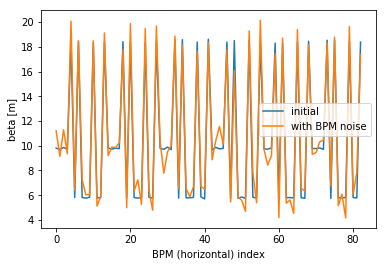

In [33]:
plt.plot([df.loc[0, name] for name in xbpms], label="initial")
plt.plot([X.loc[0, name] for name in xbpms], label="with BPM noise")

plt.xlabel("BPM (horizontal) index")
plt.ylabel("beta [m]")
plt.legend()
plt.show();

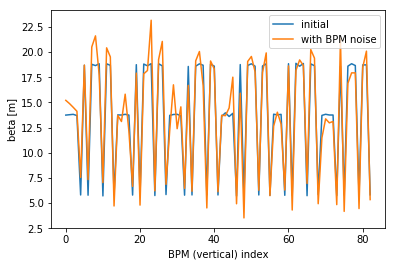

In [34]:
plt.plot([df.loc[0, name] for name in ybpms], label="initial")
plt.plot([X.loc[0, name] for name in ybpms], label="with BPM noise")

plt.xlabel("BPM (vertical) index")
plt.ylabel("beta [m]")
plt.legend()
plt.show();

In [38]:
scaler_x = StandardScaler()

x_data_noise = scaler_x.fit_transform(X)
X_scaled_noise = pd.DataFrame(x_data_noise, columns = X.columns)
X_scaled_noise.index = X.index

d_out = {
    'X_noise':X_scaled_noise, 
    'scaler_x':scaler_x,
}

for key,val in d.items():
    if key not in d_out:
        d_out[key] = d[key]



In [41]:
d.keys()

dict_keys(['X', 'Y', 'X_initial', 'Y_initial', 'scaler_x', 'scaler_y'])

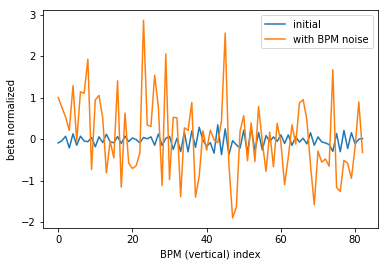

In [43]:
plt.plot([d_out["X"].loc[0, name] for name in ybpms], label="initial")
plt.plot([d_out["X_noise"].loc[0, name] for name in ybpms], label="with BPM noise")

plt.xlabel("BPM (vertical) index")
plt.ylabel("beta normalized")
plt.legend()
plt.show();

In [ ]:
pickle.dump(d_out, open("./results/dataset_scaled_noise_BPMs.p", "wb"))